In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
species_list = list(df.Species.unique())
species_dict = dict(zip(species_list, range(6)))

In [6]:
species_id = np.zeros(df.Id.count())
for i in range(species_id.shape[0]):
    species_id[i] = species_dict[df.Species.iloc[i]]


In [7]:
df['Species'] = species_id.astype(int)

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>],
       [<AxesSubplot:title={'center':'Species'}>, <AxesSubplot:>]],
      dtype=object)

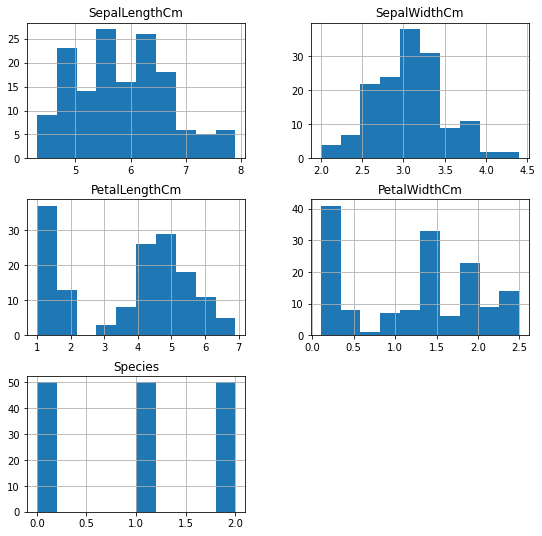

In [9]:
df = df.drop(columns='Id')
df.hist(figsize=(9,9))

In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot:>

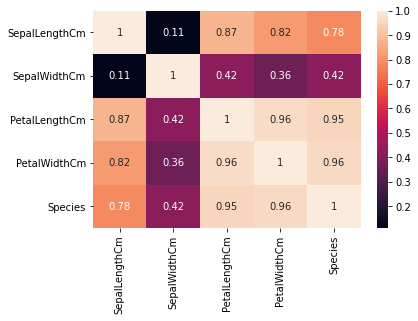

In [11]:
sns.heatmap(abs(df.corr()), annot=True)

<AxesSubplot:>

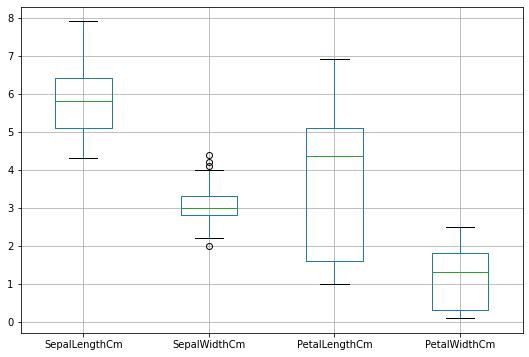

In [12]:
df.drop(columns=['Species']).boxplot(figsize=(9,6))

In [13]:
interq_dist = df.SepalWidthCm.quantile(0.75) - df.SepalWidthCm.quantile(0.25)
min_border = df.SepalWidthCm.quantile(0.25) - 1.5*interq_dist
max_border = df.SepalWidthCm.quantile(0.75) + 1.5*interq_dist
df = df.loc[(df.SepalWidthCm >= min_border) & (df.SepalWidthCm <= max_border)]

<AxesSubplot:>

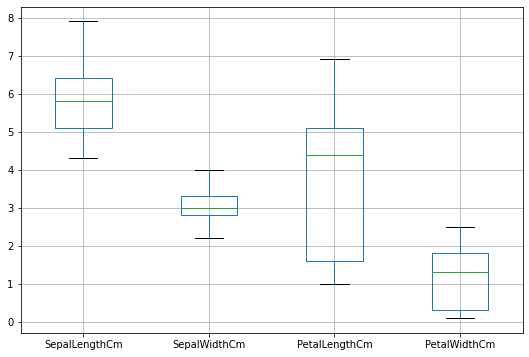

In [14]:
df.drop(columns=['Species']).boxplot(figsize=(9,6))

In [15]:
from sklearn.ensemble import RandomForestClassifier

<AxesSubplot:>

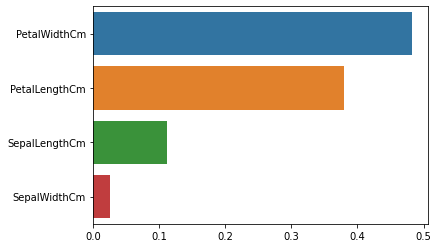

In [16]:
clf = RandomForestClassifier(criterion='entropy', n_estimators=50)
clf.fit(df.drop(columns=['Species']), df.Species)
feature_importances = clf.feature_importances_

sorted_ind = np.argsort(feature_importances)
sorted_ind = sorted_ind[::-1]
feature_importances = feature_importances[sorted_ind]

features = np.array(list(df.drop(columns=['Species'])))
features = features[sorted_ind]

sns.barplot(x=feature_importances, y=features)

In [19]:
def calc_metric(df):
    inter_sс_matrix = df.corr().values
    
    unique_classes = np.array([0,1,2])
    in_sс_matrix = np.zeros((3, inter_sс_matrix.shape[0]-1, inter_sс_matrix.shape[1]-1))
    for i in unique_classes:
        df_class_i = df.loc[df.Species == i]
        in_sс_matrix[i] = df_class_i.corr().values[:-1, :-1]
    
    in_sс_matrix_mean = np.mean(in_sс_matrix, axis=0)
    
    R_tr = np.sum(np.diag(inter_sс_matrix,1))
    R1_tr = np.sum(np.diag(in_sс_matrix_mean,1))
    criterion = R_tr/R1_tr
    return criterion

In [20]:
calc_metric(df)

1.0048883418320114

In [21]:
calc_metric(df.drop(columns='SepalWidthCm'))


2.5428309201641075

In [22]:
calc_metric(df.drop(columns=['SepalWidthCm', 'SepalLengthCm']))

4.070117352966681

<AxesSubplot:>

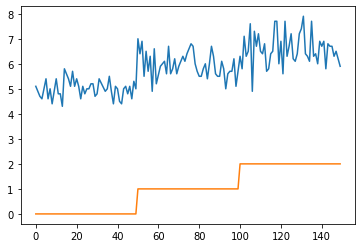

In [23]:
df.SepalLengthCm.plot()
df.Species.plot()